#### This is a workflow with Graph.

In [1]:
from langgraph.graph import MessageGraph
from langchain_core.messages import HumanMessage

def function_one(state):
    last_message = state[-1]
    result = last_message.content + " from first function"
    return HumanMessage(content = result)

def function_two(state):
    last_message = state[-1]
    result = last_message.content + " Jimmy from second function"
    return HumanMessage(content=result)

# Building the graph
workflow = MessageGraph()
workflow.add_node("function_one", function_one)
workflow.add_node("function_two", function_two)

# my workflow
workflow.add_edge("function_one", "function_two")

# Setting the entry and finish points
workflow.set_entry_point("function_one")
workflow.set_finish_point("function_two")

app_one = workflow.compile()

result = app_one.invoke([HumanMessage(content = "Hey this is tech bro")])
print(result[-1].content)

Hey this is tech bro from first function Jimmy from second function


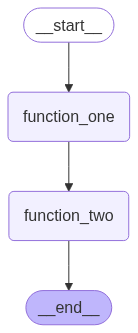

In [2]:
from IPython.display import Image, display

try:
    display(Image(app_one.get_graph().draw_mermaid_png()))
except Exception as e:
    print(e)

In [3]:
# Accessing function that is not inside workflow
def function_three(state):
    last_message = state[-1]
    result = last_message + ""
    return HumanMessage(content=result)

In [4]:
input = "Hey this is tech bro "

In [5]:
for output in app_one.stream(input):
    for key, value in output.items():
        print(f"Here is the output from {key}")
        print("____________")
        print(value.content)
        print("\n")

Here is the output from function_one
____________
Hey this is tech bro  from first function


Here is the output from function_two
____________
Hey this is tech bro  from first function Jimmy from second function




#### Creating workflow with LLM

In [6]:
from langchain_google_genai import GoogleGenerativeAIEmbeddings
embeddings = GoogleGenerativeAIEmbeddings(model = "models/embedding-001")
from langchain_groq import ChatGroq
llm = ChatGroq(model_name = "llama3-8b-8192")
llm.invoke("hi").content

/home/brian/Documents/JIM/Langgraph/env/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


"Hi! It's nice to meet you. Is there something I can help you with or would you like to chat?"

In [7]:
def function1(state):
    last_message = state[-1]
    llm = ChatGroq(model_name = "llama-3.1-8b-instant")
    response = llm.invoke(last_message.content)
    return HumanMessage(content=response.content)

def function2(state):
    last_message = state[-1]
    upper_case = last_message.content.upper()
    return HumanMessage(content=upper_case)

In [8]:
workflow_two = MessageGraph()
workflow_two.add_node("llm", function1)
workflow_two.add_node("upper_string", function2)

In [11]:
workflow_two.add_edge("llm", 'upper_string')
workflow_two.set_entry_point("llm")
workflow_two.set_finish_point("upper_string")

In [12]:
app_two =workflow_two.compile()

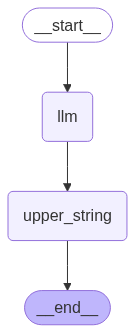

In [13]:
from IPython.display import Image, display

try:
    display(Image(app_two.get_graph().draw_mermaid_png()))
except Exception as e:
    print(e)

In [14]:
result = app_two.invoke([HumanMessage(content = "Whos is the deputy president of kenya")])
print(result[-1].content)

THE DEPUTY PRESIDENT OF KENYA IS RIGATHI GACHAGUA. HE IS THE CURRENT DEPUTY PRESIDENT AND ASSUMED OFFICE ON SEPTEMBER 6, 2022, AFTER THE RESIGNATION OF WILLIAM RUTO'S PREDECESSOR.


In [15]:
result = app_two.invoke([HumanMessage(content = "What is Gen AI explain in setails")])
print(result[-1].content)

**GEN AI: A BREAKTHROUGH IN ARTIFICIAL INTELLIGENCE**

GEN AI, ALSO KNOWN AS GENERAL AI, IS A TYPE OF ARTIFICIAL INTELLIGENCE (AI) THAT POSSESSES THE ABILITY TO PERFORM ANY INTELLECTUAL TASK THAT A HUMAN BEING CAN. IT IS A LONG-SOUGHT GOAL IN THE FIELD OF AI RESEARCH, AND ITS DEVELOPMENT HAS BEEN A MAJOR FOCUS OF MANY EXPERTS IN THE FIELD. HERE'S A DETAILED EXPLANATION OF GEN AI:

**KEY CHARACTERISTICS OF GEN AI:**

1. **AUTONOMY**: GEN AI SYSTEMS CAN OPERATE INDEPENDENTLY AND MAKE DECISIONS WITHOUT HUMAN INTERVENTION.
2. **REASONING**: GEN AI SYSTEMS CAN REASON AND DRAW CONCLUSIONS FROM A VAST AMOUNT OF DATA, SIMILAR TO HUMAN REASONING.
3. **LEARNING**: GEN AI SYSTEMS CAN LEARN FROM EXPERIENCE AND ADAPT TO NEW SITUATIONS.
4. **PROBLEM-SOLVING**: GEN AI SYSTEMS CAN SOLVE COMPLEX PROBLEMS AND MAKE DECISIONS BASED ON INCOMPLETE INFORMATION.
5. **COMMON SENSE**: GEN AI SYSTEMS CAN APPLY COMMON SENSE TO MAKE DECISIONS AND SOLVE PROBLEMS.

**TYPES OF GEN AI:**

1. **NARROW AI**: ALSO KNOWN 

In [16]:
input = "What is the capital of France"

In [17]:
for output in app_two.stream(input):
    for key, value in output.items():
        print(f"Here is the output from {key}")
        print("____________")
        print(value.content)
        print("\n")

Here is the output from llm
____________
The capital of France is Paris.


Here is the output from upper_string
____________
THE CAPITAL OF FRANCE IS PARIS.




### Implementing our own ouput token counter

In [18]:
def function3(state):
    last_message = state[-1]
    tokens = last_message.content.split()
    token_count = len(tokens)
    return HumanMessage(content=f"Total tokens count: {token_count}")


In [19]:
workflow3 = MessageGraph()
workflow3.add_node("llm", function1)
workflow3.add_node("token_counter", function3)
workflow3.add_edge("llm","token_counter")
workflow3.set_entry_point("llm")
workflow3.set_finish_point("token_counter")
app_three = workflow3.compile()

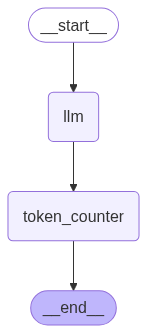

In [20]:
from IPython.display import Image, display

try:
    display(Image(app_three.get_graph().draw_mermaid_png()))
except Exception as e:
    print(e)

In [21]:
result = app_three.invoke([HumanMessage(content = "What is the capital of france?")])
print(result[-1].content)

Total tokens count: 6
